In [37]:
import pandas as pd

# Remplace par le nom de ton fichier téléchargé
df = pd.read_csv('/content/kc_house_data.csv')

# Afficher les premières lignes du dataset
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [38]:
print(df.shape)


(21613, 21)


In [39]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
print(df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [41]:
print(df.describe())


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [42]:
df.dropna(inplace=True)


In [43]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Calculate the mean of numerical columns only
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [44]:
df = pd.get_dummies(df, drop_first=True)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']])


In [46]:
X = df.drop('price', axis=1)  # Les caractéristiques
y = df['price']  # La cible (prix)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('/content/kc_house_data.csv')

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Calculate the mean of numerical columns only
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Feature Engineering for Date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column
df = df.drop('date', axis=1)

# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Now you can use the trained model for predictions, evaluation, etc.

LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Calcul du RMSE et du R²
# The 'squared' argument is deprecated. Calculate RMSE directly
# Remove 'squared=False' and calculate RMSE using np.sqrt()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 211995.46950443994
R²: 0.702718240002143


In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

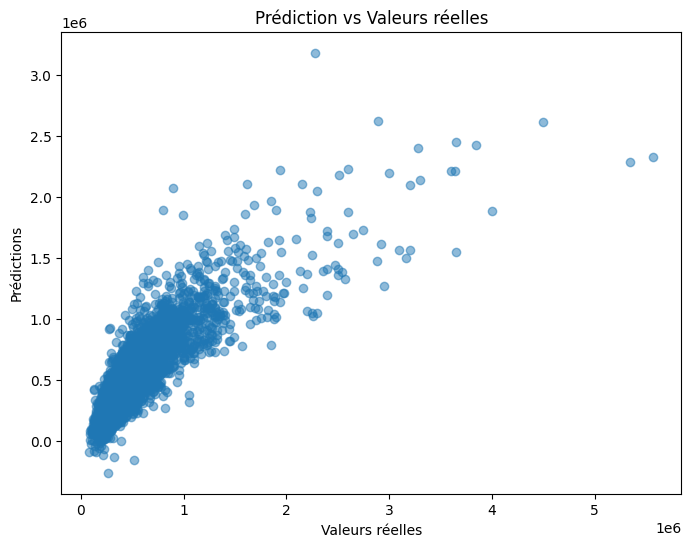

In [51]:
import matplotlib.pyplot as plt # import the pyplot module for plotting

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Prédiction vs Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.show()

In [52]:
# Choisir une maison au hasard dans l'ensemble de test
index = 3  # Tu peux modifier cet index pour tester d'autres maisons
example_house = X_test.iloc[index]  # Sélectionner les données de cette maison

# Faire une prédiction avec le modèle
predicted_price = model.predict([example_house])[0]  # Predire avec [example_house] (il faut que ce soit un tableau 2D)

# Afficher la prédiction
print(f"Prix prédit pour cette maison : {predicted_price:.2f} $")

# Afficher le prix réel pour comparer
real_price = y_test.iloc[index]
print(f"Prix réel de cette maison : {real_price:.2f} $")


Prix prédit pour cette maison : 1672043.23 $
Prix réel de cette maison : 1490000.00 $


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
import numpy as np

def predict_price(model, input_features):
    """
    Fonction pour prédire le prix d'une maison en fonction de ses caractéristiques.

    Arguments :
    - model : modèle entraîné (LinearRegression, RandomForest, etc.)
    - input_features : dictionnaire contenant les caractéristiques de la maison

    Retourne :
    - Le prix prédit
    """
    # Créer un DataFrame avec une seule ligne contenant les caractéristiques
    input_df = pd.DataFrame([input_features])

    # Vérifier si on a les mêmes colonnes que le dataset d'entraînement
    missing_cols = set(X_train.columns) - set(input_df.columns)
    if missing_cols:
        print(f"Ajout des colonnes manquantes : {missing_cols}")
        for col in missing_cols:
            input_df[col] = 0  # Remplissage avec 0 pour les colonnes manquantes

    # Réorganiser les colonnes pour correspondre au modèle
    input_df = input_df[X_train.columns]

    # Faire la prédiction
    predicted_price = model.predict(input_df)[0]

    return predicted_price

# Exemple de caractéristiques d'une maison
house_example = {
    'sqft_living': 250,   # Surface habitable (en pieds carrés)
    'sqft_lot': 500,      # Taille du terrain
    'sqft_above': 200,    # Surface au-dessus du sol
    'sqft_basement': 50,  # Surface du sous-sol
    'bedrooms': 3,         # Nombre de chambres
    'bathrooms': 2,      # Nombre de salles de bain
    'floors': 1,           # Nombre d'étages
    'waterfront': 0,       # 1 si la maison est au bord de l'eau, sinon 0
    'view': 1,             # Qualité de la vue (de 0 à 4)
    'condition': 2,        # État général de la maison (de 1 à 5)
    'grade': 7,            # Niveau de construction et finition (de 1 à 13)
    'year': 2005,          # Année de construction
    'month': 6,            # Mois de vente
    'day': 15             # Jour de vente
}

# Prédire le prix de la maison avec le modèle entraîné
predicted_price = predict_price(model, house_example)

# Afficher le prix prédit
print(f"🏠 Prix prédit de la maison : {predicted_price:,.2f} $")


Ajout des colonnes manquantes : {'sqft_living15', 'id', 'lat', 'zipcode', 'yr_built', 'long', 'yr_renovated', 'sqft_lot15'}
🏠 Prix prédit de la maison : 45,841,803.14 $


In [55]:
import pickle
from sklearn.linear_model import LinearRegression

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Sauvegarder le modèle
with open("house_price_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [56]:
import pickle

# Charger le modèle correctement
with open("house_price_model.pkl", "rb") as file:
    model = pickle.load(file)

print(type(model))  # Doit afficher <class 'sklearn.linear_model._base.LinearRegression'>


<class 'sklearn.linear_model._base.LinearRegression'>


In [57]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Charger les données
df = pd.read_csv("kc_house_data.csv")

# Sélectionner les caractéristiques
features = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "bedrooms", "bathrooms", "floors", "condition"]
target = "price"

# Séparation des données
X = df[features]
y = df[target]

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Sauvegarder le modèle et le scaler
with open("house_price_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Modèle et scaler sauvegardés avec succès !")


✅ Modèle et scaler sauvegardés avec succès !
